In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# load data
data = pd.read_csv('OSMH_2016_cleaned.csv')

In [3]:
data

,mental_health_benefit_employer,knowledge_mh_care_employer,disc_emp_mental_health,employer_mh_resoureces,anonymity_mh_care,mh_leave_request,mh_disoder_neg_consequences,ph_disoder_neg_consequences,comfortable_dicuss_mhd_coworkers,comfortable_dicuss_mhd_supervisor,...,mhd_past,mhd_currently,mhd_diagnosed,mhd_interferes_work_treated,mhd_interferes_work_untreated,work_remotely,gender,company_size,What is your age?,age_scaled
0,neutral,no,no,no,neutral,yes,no,no,neutral,yes,...,yes,no,yes,neutral,neutral,some,male,26-100,39,0.392157
1,no,yes,yes,yes,yes,some,no,no,neutral,yes,...,yes,yes,yes,rarely,some,no,male,6-25,29,0.196078
2,no,no,no,no,neutral,neutral,neutral,no,neutral,neutral,...,neutral,no,no,neutral,neutral,yes,male,6-25,38,0.372549
3,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,yes,yes,yes,some,some,some,male,26-100,43,0.470588
4,yes,yes,no,no,no,neutral,yes,neutral,neutral,no,...,yes,yes,yes,some,some,some,female,6-25,43,0.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,no,no,no,neutral,neutral,some,female,26-100,34,0.294118
1423,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,no,no,yes,some,yes,some,male,26-100,56,0.725490
1424,yes,yes,yes,yes,neutral,rarely,neutral,neutral,yes,yes,...,yes,neutral,yes,rarely,some,some,male,100-500,52,0.647059
1425,neutral,neutral,no,yes,neutral,rarely,neutral,no,neutral,yes,...,neutral,yes,yes,some,yes,some,female,100-500,30,0.215686


## Feature engineering:


In [4]:
# group the age feature
bins = [19,36,53,70]
labels = ['junior', 'intermediate', 'senior']
data['age_group']= pd.cut(data['What is your age?'], bins = bins, labels = labels)
data['age_group'] = data['age_group'].astype('object')
data

,mental_health_benefit_employer,knowledge_mh_care_employer,disc_emp_mental_health,employer_mh_resoureces,anonymity_mh_care,mh_leave_request,mh_disoder_neg_consequences,ph_disoder_neg_consequences,comfortable_dicuss_mhd_coworkers,comfortable_dicuss_mhd_supervisor,...,mhd_currently,mhd_diagnosed,mhd_interferes_work_treated,mhd_interferes_work_untreated,work_remotely,gender,company_size,What is your age?,age_scaled,age_group
0,neutral,no,no,no,neutral,yes,no,no,neutral,yes,...,no,yes,neutral,neutral,some,male,26-100,39,0.392157,intermediate
1,no,yes,yes,yes,yes,some,no,no,neutral,yes,...,yes,yes,rarely,some,no,male,6-25,29,0.196078,junior
2,no,no,no,no,neutral,neutral,neutral,no,neutral,neutral,...,no,no,neutral,neutral,yes,male,6-25,38,0.372549,intermediate
3,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,yes,yes,some,some,some,male,26-100,43,0.470588,intermediate
4,yes,yes,no,no,no,neutral,yes,neutral,neutral,no,...,yes,yes,some,some,some,female,6-25,43,0.470588,intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,no,no,neutral,neutral,some,female,26-100,34,0.294118,junior
1423,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,no,yes,some,yes,some,male,26-100,56,0.725490,senior
1424,yes,yes,yes,yes,neutral,rarely,neutral,neutral,yes,yes,...,neutral,yes,rarely,some,some,male,100-500,52,0.647059,intermediate
1425,neutral,neutral,no,yes,neutral,rarely,neutral,no,neutral,yes,...,yes,yes,some,yes,some,female,100-500,30,0.215686,junior


In [5]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object'])
numerical_cols = data.select_dtypes(exclude=['object'])
categorical_cols

,mental_health_benefit_employer,knowledge_mh_care_employer,disc_emp_mental_health,employer_mh_resoureces,anonymity_mh_care,mh_leave_request,mh_disoder_neg_consequences,ph_disoder_neg_consequences,comfortable_dicuss_mhd_coworkers,comfortable_dicuss_mhd_supervisor,...,family_history_mhd,mhd_past,mhd_currently,mhd_diagnosed,mhd_interferes_work_treated,mhd_interferes_work_untreated,work_remotely,gender,company_size,age_group
0,neutral,no,no,no,neutral,yes,no,no,neutral,yes,...,no,yes,no,yes,neutral,neutral,some,male,26-100,intermediate
1,no,yes,yes,yes,yes,some,no,no,neutral,yes,...,yes,yes,yes,yes,rarely,some,no,male,6-25,junior
2,no,no,no,no,neutral,neutral,neutral,no,neutral,neutral,...,no,neutral,no,no,neutral,neutral,yes,male,6-25,intermediate
3,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,no,yes,yes,yes,some,some,some,male,26-100,intermediate
4,yes,yes,no,no,no,neutral,yes,neutral,neutral,no,...,yes,yes,yes,yes,some,some,some,female,6-25,intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,yes,no,no,no,neutral,neutral,some,female,26-100,junior
1423,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,yes,no,no,yes,some,yes,some,male,26-100,senior
1424,yes,yes,yes,yes,neutral,rarely,neutral,neutral,yes,yes,...,yes,yes,neutral,yes,rarely,some,some,male,100-500,intermediate
1425,neutral,neutral,no,yes,neutral,rarely,neutral,no,neutral,yes,...,yes,neutral,yes,yes,some,yes,some,female,100-500,junior


In [6]:
# one hot encode data
# drop target before run one hot encode
drop_target = categorical_cols.drop("mhd_currently", axis = 1)
for col in drop_target:
      print(col)
# one hot encode the features
X = pd.get_dummies(drop_target).astype(int)
X

mental_health_benefit_employer
knowledge_mh_care_employer
disc_emp_mental_health
employer_mh_resoureces
anonymity_mh_care
mh_leave_request
mh_disoder_neg_consequences
ph_disoder_neg_consequences
comfortable_dicuss_mhd_coworkers
comfortable_dicuss_mhd_supervisor
mh_equal_to_ph
when_open_mhd_neg_consequences
prev_emp_mh_benefits
awareness_mh_benefits_prev_emp
discuss_prev_empl_mh
prev_empl_privde_recources_mh
anonymity_mh_treatment_prev_empl
prev_empl_discuss_mhd_neg
prev_empl_discuss_phd_neg
willing_discuss_mh_coworker
willing_discuss_mh_supervisor
prev_empl_mh_equal_ph
observe_neg_cons_mh_prev_empl
willing_discuss_ph_potent_empl
willing_discuss_mh_potent_empl
mhd_hurt_career
neg_view_coworker_mhd
willing_share_mhd_family_friends
unsupportive_mhd_prev_empl
family_history_mhd
mhd_past
mhd_diagnosed
mhd_interferes_work_treated
mhd_interferes_work_untreated
work_remotely
gender
company_size
age_group


,mental_health_benefit_employer_neutral,mental_health_benefit_employer_no,mental_health_benefit_employer_yes,knowledge_mh_care_employer_neutral,knowledge_mh_care_employer_no,knowledge_mh_care_employer_yes,disc_emp_mental_health_neutral,disc_emp_mental_health_no,disc_emp_mental_health_yes,employer_mh_resoureces_neutral,...,gender_other,company_size_1-5,company_size_100-500,company_size_26-100,company_size_500-1000,company_size_6-25,company_size_more than 1000,age_group_intermediate,age_group_junior,age_group_senior
0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1423,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1424,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1425,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
for col in X:
    print(col)

mental_health_benefit_employer_neutral
mental_health_benefit_employer_no
mental_health_benefit_employer_yes
knowledge_mh_care_employer_neutral
knowledge_mh_care_employer_no
knowledge_mh_care_employer_yes
disc_emp_mental_health_neutral
disc_emp_mental_health_no
disc_emp_mental_health_yes
employer_mh_resoureces_neutral
employer_mh_resoureces_no
employer_mh_resoureces_yes
anonymity_mh_care_neutral
anonymity_mh_care_no
anonymity_mh_care_yes
mh_leave_request_neutral
mh_leave_request_no
mh_leave_request_rarely
mh_leave_request_some
mh_leave_request_yes
mh_disoder_neg_consequences_neutral
mh_disoder_neg_consequences_no
mh_disoder_neg_consequences_yes
ph_disoder_neg_consequences_neutral
ph_disoder_neg_consequences_no
ph_disoder_neg_consequences_yes
comfortable_dicuss_mhd_coworkers_neutral
comfortable_dicuss_mhd_coworkers_no
comfortable_dicuss_mhd_coworkers_yes
comfortable_dicuss_mhd_supervisor_neutral
comfortable_dicuss_mhd_supervisor_no
comfortable_dicuss_mhd_supervisor_yes
mh_equal_to_ph_neu

In [8]:
num_data = pd.DataFrame(data['age_scaled'])
#add numerical columns to the features
X = pd.concat([X, num_data], axis = 1)
#extract target
y = pd.DataFrame(categorical_cols['mhd_currently'])
#labelencode target
le = LabelEncoder()
y_le= le.fit_transform(y)
y_le


/Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 2, 1, ..., 0, 2, 2])

# compute mutual information

In [9]:
# compute mutual information
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y_le)
#print mutual information
feature_names = X.columns
mi_score = pd.Series(mi, index = feature_names).sort_values(ascending = False)
print(mi_score)

mhd_interferes_work_untreated_neutral        0.286783
mhd_diagnosed_no                             0.264515
mhd_past_no                                  0.250543
mhd_diagnosed_yes                            0.241817
mhd_past_yes                                 0.236440
                                               ...   
when_open_mhd_neg_consequences_no            0.000000
mh_equal_to_ph_yes                           0.000000
comfortable_dicuss_mhd_supervisor_yes        0.000000
comfortable_dicuss_mhd_supervisor_neutral    0.000000
age_scaled                                   0.000000
Length: 129, dtype: float64


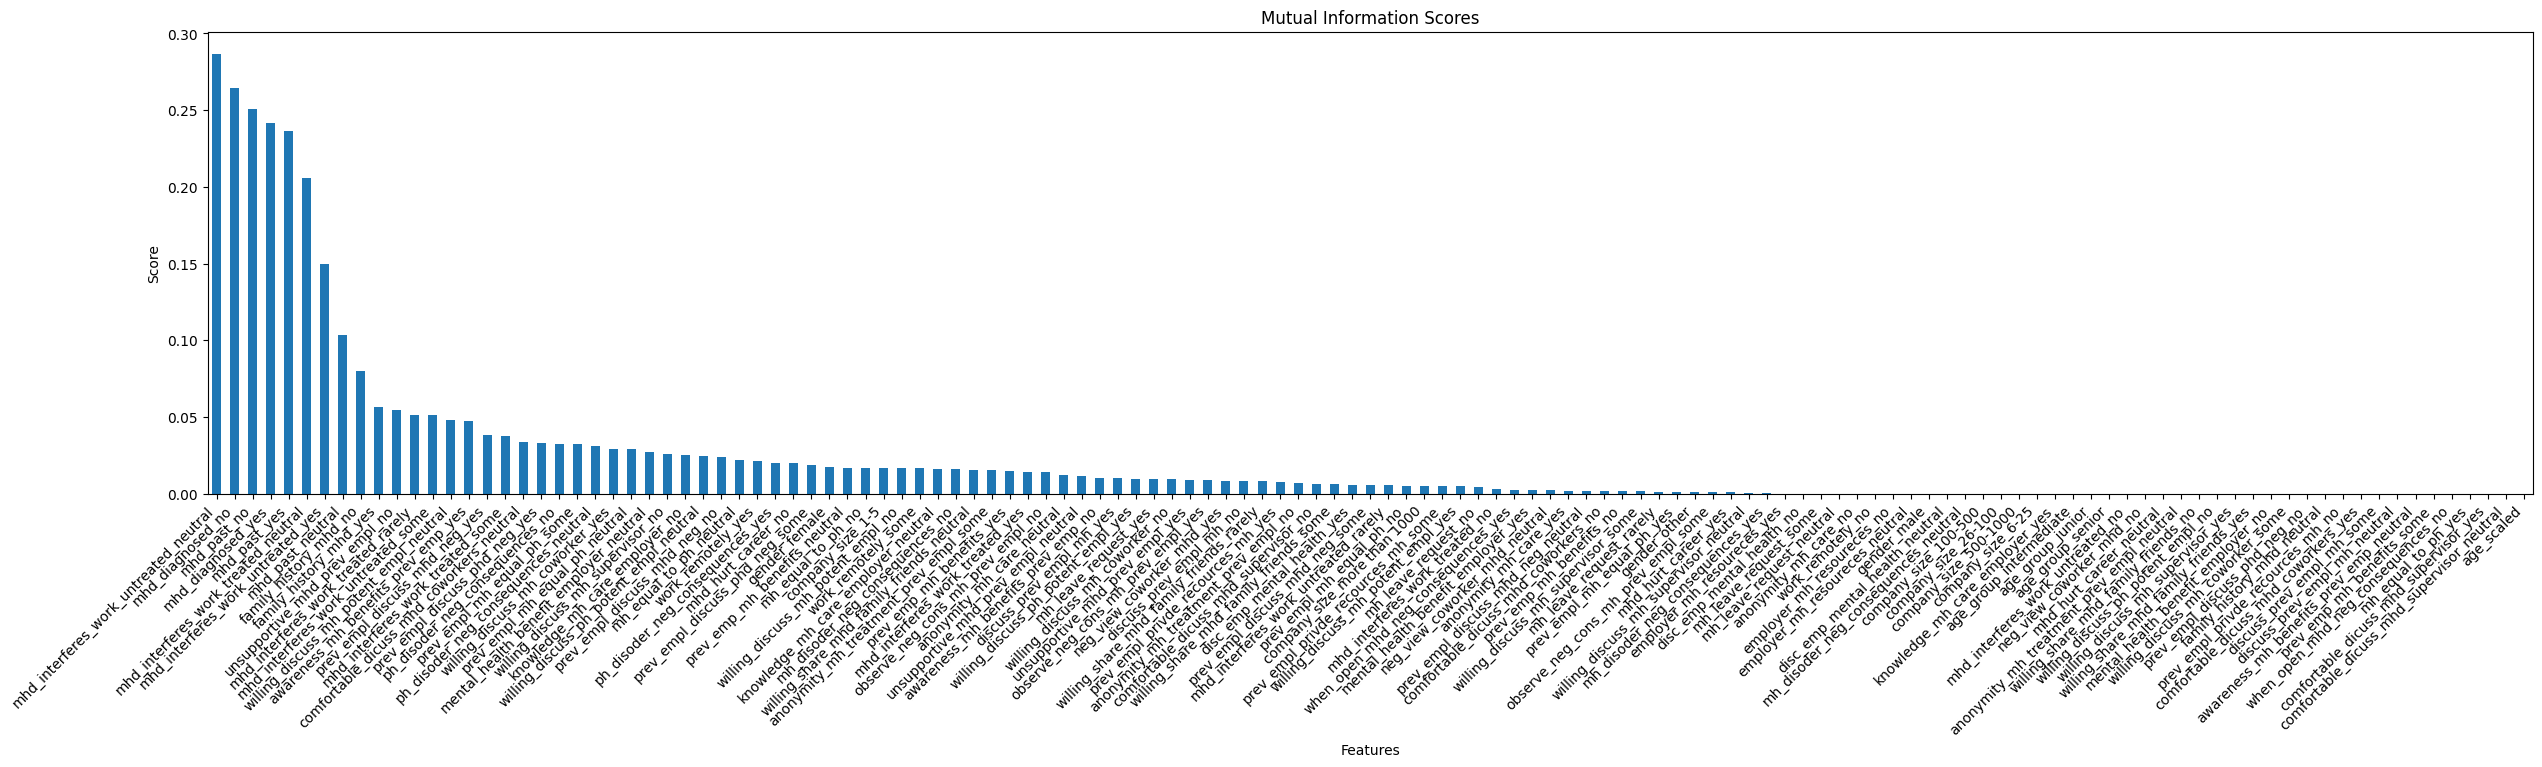

In [10]:
plt.figure(figsize=(30, 6))
mi_score.plot(kind='bar')
plt.title('Mutual Information Scores')
plt.xticks(rotation= 45, ha= "right")
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()


In [11]:
# Feature selection based on a threshold
#threshold = 0.05  # Define your threshold
mi0_05  = mi_score[mi_score > 0.05].index
mi0_01 = mi_score[mi_score > 0.01].index



In [12]:
len(mi0_05)

13

In [13]:
len(mi0_01)

50

## test feature selection with chi 2 

In [14]:
#compute chi2 
from sklearn.feature_selection import chi2
chi2_scores, p_values = chi2(X, y_le)

In [15]:
#print chi2 results
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2_Score': chi2_scores, 'P_Value': p_values})
chi2_results = chi2_results.sort_values(by='Chi2_Score', ascending=False)
print("Chi-Squared Test Results:")
print(chi2_results)


Chi-Squared Test Results:
                                   Feature  Chi2_Score        P_Value
108  mhd_interferes_work_untreated_neutral  486.498651  2.281183e-106
99                             mhd_past_no  398.388978   3.096939e-87
103    mhd_interferes_work_treated_neutral  345.153486   1.124276e-75
101                       mhd_diagnosed_no  309.703840   5.606163e-68
102                      mhd_diagnosed_yes  309.270081   6.963944e-68
..                                     ...         ...            ...
24          ph_disoder_neg_consequences_no    0.161116   9.226015e-01
48        prev_empl_privde_recources_mh_no    0.103395   9.496160e-01
126                       age_group_junior    0.101346   9.505895e-01
45                 discuss_prev_empl_mh_no    0.015030   9.925130e-01
128                             age_scaled    0.000698   9.996510e-01

[129 rows x 3 columns]


In [16]:
#feature selection based on p-value threshold
#p_value_threshold = 0.01  # Define your threshold
#selected_features_chi2 = chi2_results[chi2_results['P_Value'] < p_value_threshold]['Feature']
chi0_05 = chi2_results[chi2_results['P_Value'] < 0.05]['Feature']
chi0_01 = chi2_results[chi2_results['P_Value'] < 0.01]['Feature']
#print(f"Selected features based on p-value threshold ({p_value_threshold}):")
#print(selected_features_chi2)
#len(selected_features_chi2)

In [17]:
len(chi0_05)
chi0_05

108    mhd_interferes_work_untreated_neutral
99                               mhd_past_no
103      mhd_interferes_work_treated_neutral
101                         mhd_diagnosed_no
102                        mhd_diagnosed_yes
                       ...                  
47                  discuss_prev_empl_mh_yes
40                  prev_emp_mh_benefits_yes
17                   mh_leave_request_rarely
81                   mhd_hurt_career_neutral
92        unsupportive_mhd_prev_empl_neutral
Name: Feature, Length: 68, dtype: object

In [18]:
len(chi0_01)

51

In [19]:
chi0_05

108    mhd_interferes_work_untreated_neutral
99                               mhd_past_no
103      mhd_interferes_work_treated_neutral
101                         mhd_diagnosed_no
102                        mhd_diagnosed_yes
                       ...                  
47                  discuss_prev_empl_mh_yes
40                  prev_emp_mh_benefits_yes
17                   mh_leave_request_rarely
81                   mhd_hurt_career_neutral
92        unsupportive_mhd_prev_empl_neutral
Name: Feature, Length: 68, dtype: object

## Dimensionality reduciton on one hot encoded data
 ### t-SNE
 

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np


In [21]:
def tsne(features,data):
    #from sklearn.manifold import TSNE
    np.random.seed(42)
    tsne = TSNE(n_components=2, random_state=42)
    X = features[data]
    X
    X_tsne= tsne.fit_transform(X)
    X_tsne
    tsne_results= pd.DataFrame(X_tsne , columns=['t-SNE_1', 't-SNE_2'])
    tsne_results
    tsne_results['Label'] = categorical_cols['mhd_currently']
    tsne_results
    sil_score = silhouette_score(X_tsne, y_le)
    #print(sil_score)
    #print(f'Silhouette Score: {sil_score}')
    #calculate k-NN accuracy

    X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

    # Train a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Compute accuracy
    knn_accuracy = accuracy_score(y_test, y_pred)
    #print(knn_accuracy)

    return sil_score,knn_accuracy, tsne_results, X, X_tsne

In [22]:
#Tsne performance with data from chi2 with o.o5 theshold
sil_score_chi_005, knn_chi_005, tsne_result_chi005, X_chi005, X_tsne_chi005 = tsne(X,chi0_05)
#print(sil_score_chi_005)
#print(knn_chi_005)
print(tsne_result_chi005)

        t-SNE_1    t-SNE_2    Label
0     50.709888  -3.607782       no
1    -19.316607  20.985754      yes
2     20.841034 -14.095844       no
3      1.908684   3.025025      yes
4    -24.768692 -16.717587      yes
...         ...        ...      ...
1422  29.478554  10.080640       no
1423 -10.369614  -5.599628       no
1424 -35.654877   4.256191  neutral
1425 -18.946051  -5.372372      yes
1426   9.758971 -13.132642      yes

[1427 rows x 3 columns]


/Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [23]:
#Tsne performance with data from chi2 with 0.01 theshold
sil_score_chi_001, knn_chi_001, tsne_result_chi001, X_chi001, X_tsne_chi001 = tsne(X,chi0_01)
print(sil_score_chi_001)
print(knn_chi_001)

0.15101106
0.6748251748251748


/Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [24]:
# calculate tsne performance with MI and 0.01 threshold
sil_score_mi_001, knn_mi_001, tsne_result_mi001, X_mi001, X_tsne_mi001 = tsne(X,mi0_01)
print(sil_score_mi_001)
print(knn_mi_001)

0.15505509
0.7167832167832168


/Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [25]:
# calculate tsne performance with MI and 0.05 threshold
sil_score_mi_005, knn_mi_005, tsne_result_mi005, X_mi005, X_tsne_mi005 = tsne(X,mi0_05)
print(sil_score_mi_005)
print(knn_mi_005)

0.10363455
0.7412587412587412


/Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [26]:
X_mi005

,mhd_interferes_work_untreated_neutral,mhd_diagnosed_no,mhd_past_no,mhd_diagnosed_yes,mhd_past_yes,mhd_interferes_work_treated_neutral,mhd_interferes_work_untreated_yes,mhd_past_neutral,family_history_mhd_no,family_history_mhd_yes,unsupportive_mhd_prev_empl_no,mhd_interferes_work_treated_rarely,mhd_interferes_work_untreated_some
0,1,0,0,1,1,1,0,0,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,1,1,1,1
2,1,1,0,0,0,1,0,1,1,0,0,0,0
3,0,0,0,1,1,0,0,0,1,0,1,0,1
4,0,0,0,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1,1,1,0,0,1,0,0,0,1,0,0,0
1423,0,0,1,1,0,0,1,0,0,1,0,0,0
1424,0,0,0,1,1,0,0,0,0,1,0,1,1
1425,0,0,0,1,0,0,1,1,0,1,0,0,0


In [27]:
X_tsne_mi005

array([[ -9.216305 , -12.271477 ],
       [-32.441277 ,  18.200752 ],
       [ 15.476472 ,  28.492392 ],
       ...,
       [-27.043167 ,  28.975067 ],
       [-11.322352 ,   1.8862   ],
       [  2.9021099,  -1.3680642]], dtype=float32)

In [28]:
comp_chi_mi_tsne_results = {
    "threshold": [0.01, 0.05],
    "num features chi2": [len(chi0_01), len(chi0_05)],
    'silhouette_score_chi': [sil_score_chi_001, sil_score_chi_005],
    'k-NN accuracy_chi': [knn_chi_001,knn_chi_005],
    'num features MI': [len(mi0_01), len(mi0_05)],
    'silhouette_score_mi': [sil_score_chi_001, sil_score_chi_005],
    'k-NN accuracy_mi': [knn_mi_001,knn_mi_005]
}

In [29]:
data_comparison = pd.DataFrame(comp_chi_mi_tsne_results)
data_comparison

,threshold,num features chi2,silhouette_score_chi,k-NN accuracy_chi,num features MI,silhouette_score_mi,k-NN accuracy_mi
0,0.01,51,0.151011,0.674825,50,0.151011,0.716783
1,0.05,68,0.142406,0.671329,13,0.142406,0.741259


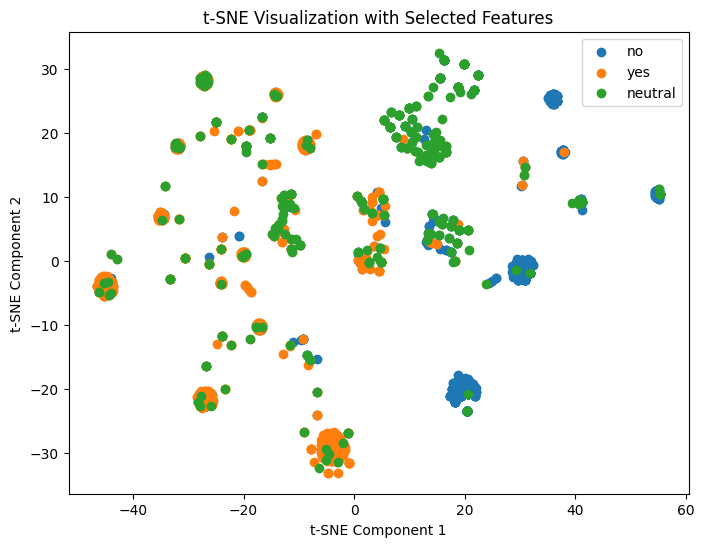

In [30]:
#show t-SNE mi 0.05 results
plt.figure(figsize=(8, 6))
for label in tsne_result_mi005['Label'].unique():
    subset = tsne_result_mi005[tsne_result_mi005['Label'] == label]
    plt.scatter(subset['t-SNE_1'], subset['t-SNE_2'], label=label)
plt.title('t-SNE Visualization with Selected Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

## kmode clustering


### run kmode on mi with 0.05

In [31]:
import pandas as pd
from kmodes.kmodes import KModes
import seaborn as sns

In [32]:
y

,mhd_currently
0,no
1,yes
2,no
3,yes
4,yes
...,...
1422,no
1423,no
1424,neutral
1425,yes


In [33]:
#one hot encode targat variable
encoder = OneHotEncoder(sparse_output=False)#, dtype = int)
y_onehot = pd.get_dummies(y['mhd_currently'], dtype = int)
y_onehot

,neutral,no,yes
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
1422,0,1,0
1423,0,1,0
1424,1,0,0
1425,0,0,1


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6858.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 6858.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 6858.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6858.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 6858.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 111, cost: 3532.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 278, cost: 3532.0
Run 2, iteration: 2/100, moves: 4, cost: 3532.0
Init: initializing centroids
I

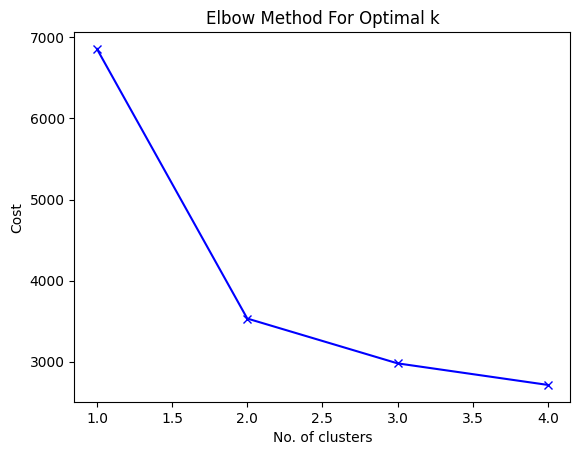

In [34]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X_mi005)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
# run clustering withou dimesnionality reduction
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(X_mi005)

# Add the cluster assignments to the t-SNE DataFrame
final_mi005 = pd.concat([X_mi005, y_onehot], axis = 1)
final_mi005['Cluster'] = clusters
final_mi005
    

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 145, cost: 3244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 309, cost: 3040.0
Run 2, iteration: 2/100, moves: 100, cost: 3040.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 193, cost: 3318.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 142, cost: 3226.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 144, cost: 3028.0
Run 5, iteration: 2/100, moves: 6, cost: 3028.0
Best run was number 5


,mhd_interferes_work_untreated_neutral,mhd_diagnosed_no,mhd_past_no,mhd_diagnosed_yes,mhd_past_yes,mhd_interferes_work_treated_neutral,mhd_interferes_work_untreated_yes,mhd_past_neutral,family_history_mhd_no,family_history_mhd_yes,unsupportive_mhd_prev_empl_no,mhd_interferes_work_treated_rarely,mhd_interferes_work_untreated_some,neutral,no,yes,Cluster
0,1,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,1
1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0
2,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1
3,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,2
4,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1423,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1424,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,0
1425,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0


In [36]:
# Calculate centroids for each cluster
centroids = final_mi005.groupby('Cluster').mean()
print("Cluster Centroids:")
centroids
#cluster 0 = mhd currently yes
#cluster 1 = mhd currently no
#cluster2 = mhd currently neutral


Cluster Centroids:


,mhd_interferes_work_untreated_neutral,mhd_diagnosed_no,mhd_past_no,mhd_diagnosed_yes,mhd_past_yes,mhd_interferes_work_treated_neutral,mhd_interferes_work_untreated_yes,mhd_past_neutral,family_history_mhd_no,family_history_mhd_yes,unsupportive_mhd_prev_empl_no,mhd_interferes_work_treated_rarely,mhd_interferes_work_untreated_some,neutral,no,yes
Cluster,,,,,,,,,,,,,,,,
0,0.032258,0.075736,0.026648,0.924264,0.899018,0.063114,0.685835,0.074334,0.148668,0.708275,0.315568,0.359046,0.244039,0.180926,0.109397,0.709677
1,0.936170,0.985106,0.804255,0.014894,0.031915,0.957447,0.027660,0.163830,0.648936,0.172340,0.608511,0.004255,0.010638,0.134043,0.846809,0.019149
2,0.012295,0.803279,0.204918,0.196721,0.319672,0.245902,0.139344,0.475410,0.303279,0.336066,0.590164,0.254098,0.745902,0.549180,0.209016,0.241803


In [37]:
# Calculate summary statistics for each cluster
cluster_summary = final_mi005.groupby('Cluster').agg(['mean', 'median', 'std'])
print("Cluster Summary Statistics:")
cluster_summary


Cluster Summary Statistics:


mhd_interferes_work_untreated_neutral                   \
                                         mean median       std   
Cluster                                                          
0                                    0.032258    0.0  0.176809   
1                                    0.936170    1.0  0.244710   
2                                    0.012295    0.0  0.110426   

        mhd_diagnosed_no                  mhd_past_no                   \
                    mean median       std        mean median       std   
Cluster                                                                  
0               0.075736    0.0  0.264761    0.026648    0.0  0.161165   
1               0.985106    1.0  0.121256    0.804255    1.0  0.397196   
2               0.803279    1.0  0.398337    0.204918    0.0  0.404471   

        mhd_diagnosed_yes  ... mhd_interferes_work_untreated_some   neutral  \
                     mean  ...                                std      mean   
Cluster                    ...                                                
0                0.924264  ...                           0.429818  0.180926   
1                0.014894  ...                           0.102701  0.134043   
2                0.196721  ...                           0.436248  0.549180   

                                no                        yes                   
        median       std      mean median       std      mean median       std  
Cluster                                                                         
0          0.0  0.385227  0.109397    0.0  0.312356  0.709677    1.0  0.454230  
1          0.0  0.341061  0.846809    1.0  0.360556  0.019149    0.0  0.137194  
2          1.0  0.498598  0.209016    0.0  0.407442  0.241803    0.0  0.429056  

[3 rows x 48 columns]

In [38]:
# Some functions to plot just the variables that has significant deviation from global mean
def outside_limit(df, label_col, label, sensitivity):
  feature_list = X_mi005.columns[:-1]
  
  plot_list = []
  mean_overall_list = []
  mean_cluster_list = []
  
  for i,varname in enumerate(feature_list):
    
    #     get overall mean for a variable, set lower and upper limit
    mean_overall = df[varname].mean()
    lower_limit = mean_overall - (mean_overall*sensitivity)
    upper_limit = mean_overall + (mean_overall*sensitivity)

    #     get cluster mean for a variable
    cluster_filter = df[label_col]==label
    pd_cluster = df[cluster_filter]
    mean_cluster = pd_cluster[varname].mean()
    
    #     create filter to display graph with 0.5 deviation from the mean
    if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
      plot_list.append(varname)
      mean_overall_std = mean_overall/mean_overall
      mean_cluster_std = mean_cluster/mean_overall
      mean_overall_list.append(mean_overall_std)
      mean_cluster_list.append(mean_cluster_std)
   
  mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
  mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)
  
  return mean_df

def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
  
  mean_df = outside_limit(df, label_col, label, sensitivity)
  mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)
  
  if len(mean_df.index) != 0:
    sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                alpha=0.75, dodge=True, ax=ax)

    for i,p in enumerate(ax.patches):
      ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')
  
  ax.set_title('Unique Characteristics of Cluster ' + str(label))
  ax.set_xlabel('Standardized Mean')
  ax.axvline(x=1, color='k')

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
  n_plot = n_clusters
  fig, ax = plt.subplots(n_plot, 1, figsize=(12, n_plot*6), sharex='col')
  ax= ax.ravel()
  
  label = np.arange(n_clusters)
  for i in label:
    plot_barchart_all_unique_features(df, label_col, label=i, ax=ax[i], sensitivity=sensitivity)
    ax[i].xaxis.set_tick_params(labelbottom=True)
    
  plt.tight_layout()
  display(fig)

/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_765/3632746770.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_765/3632746770.py:42: UserWarning: The palette list has more values (20) than needed (12), which may not be intended.
  sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_765/3632746770.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


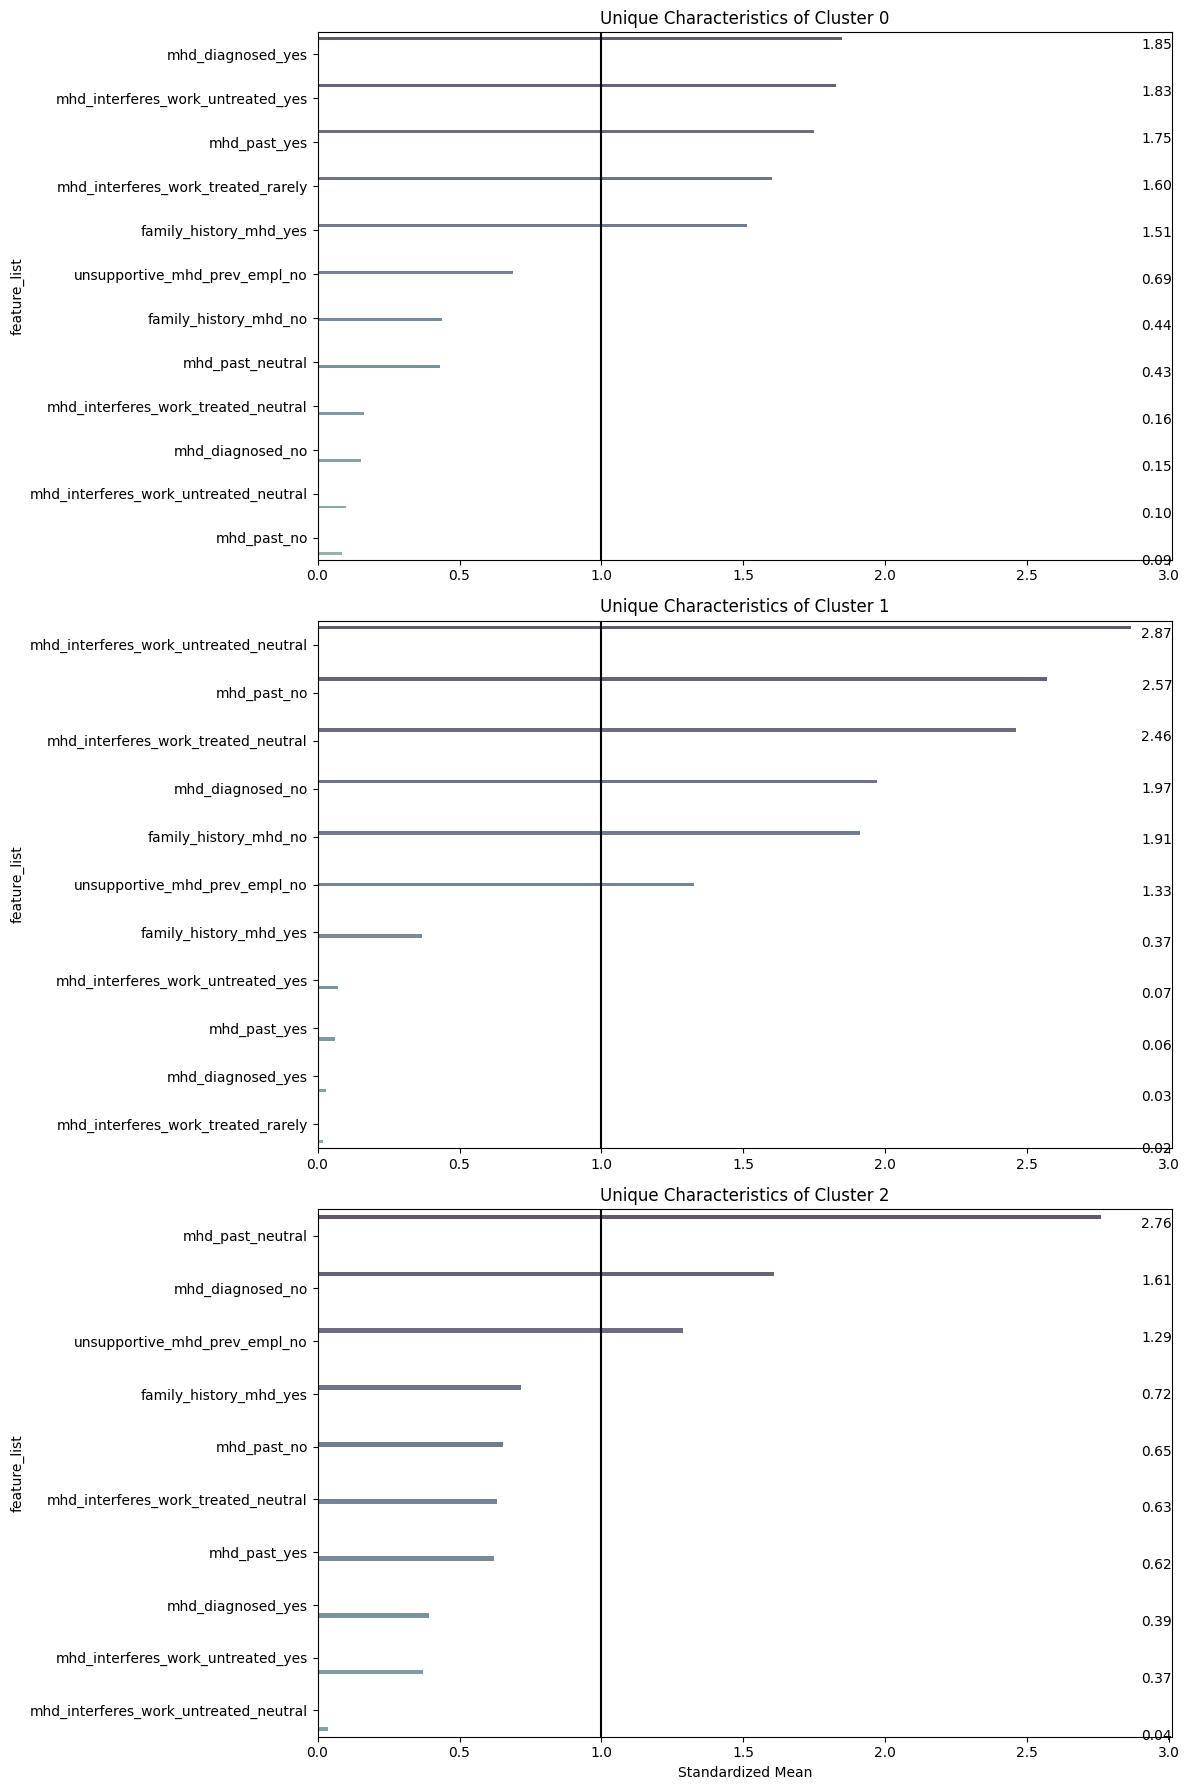

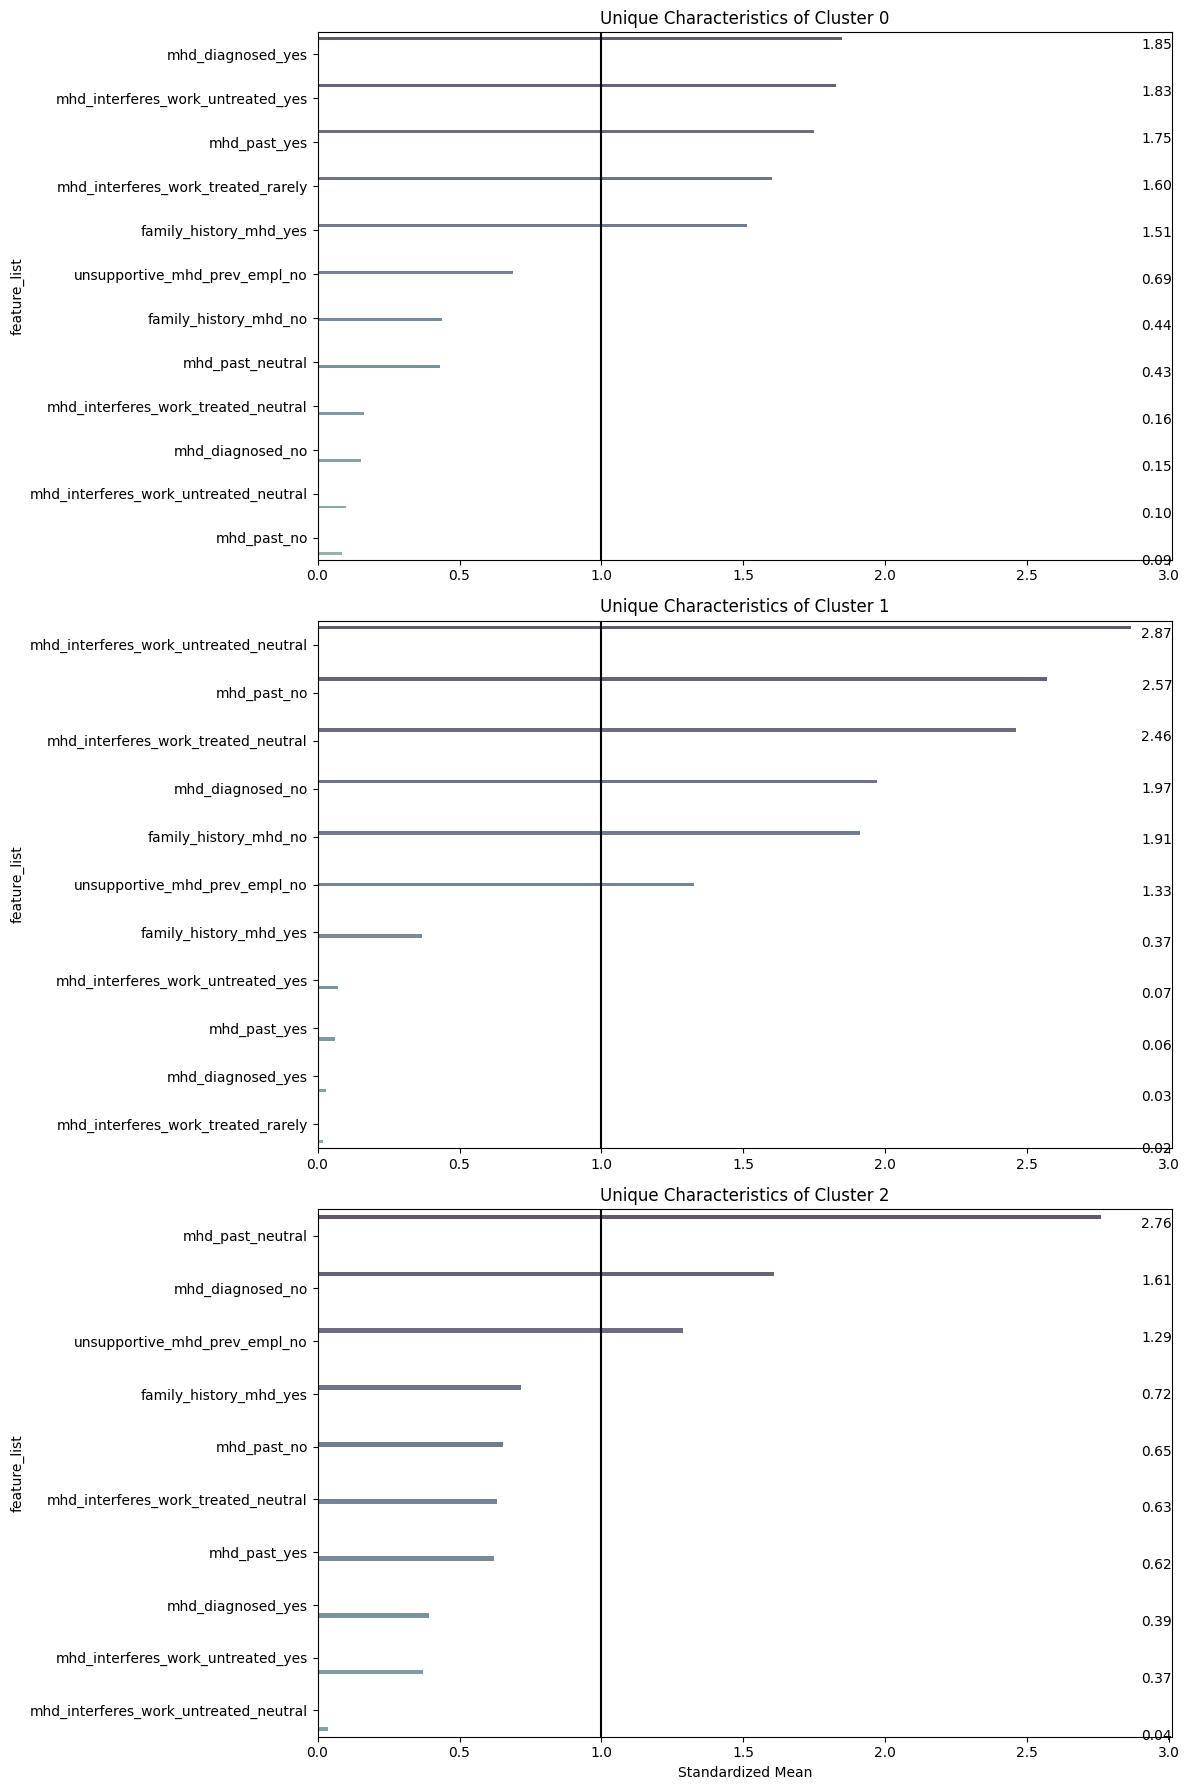

In [39]:
plot_features_all_cluster(df=final_mi005, label_col='Cluster', n_clusters=3, sensitivity=0.2)

In [40]:
final_mi005

,mhd_interferes_work_untreated_neutral,mhd_diagnosed_no,mhd_past_no,mhd_diagnosed_yes,mhd_past_yes,mhd_interferes_work_treated_neutral,mhd_interferes_work_untreated_yes,mhd_past_neutral,family_history_mhd_no,family_history_mhd_yes,unsupportive_mhd_prev_empl_no,mhd_interferes_work_treated_rarely,mhd_interferes_work_untreated_some,neutral,no,yes,Cluster
0,1,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,1
1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0
2,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1
3,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,2
4,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1423,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1424,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,0
1425,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0


# run Kmode clsutering with T-Sne results


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 2703.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2703.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4, cost: 3357.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2, cost: 2703.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3355.0
Best run was number 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


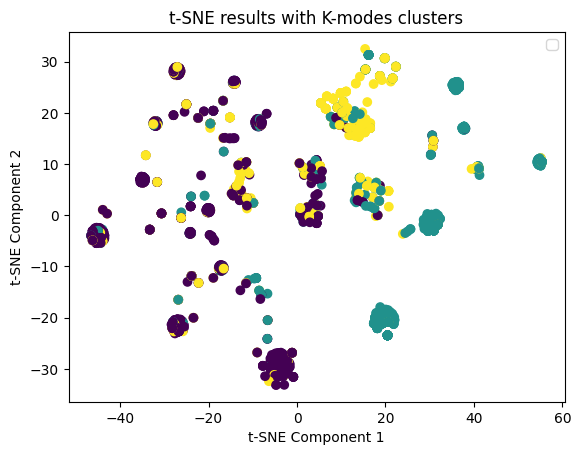

In [54]:
# Run K-modes clustering from t-sne chi2 
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters_tsne = km.fit_predict(tsne_result_mi005)

# Add the cluster assignments to the t-SNE DataFrame
tsne_result_mi005['Cluster'] = clusters_tsne

# Plot the clustered t-SNE results
plt.scatter(tsne_result_mi005['t-SNE_1'], tsne_result_mi005['t-SNE_2'], c=tsne_result_mi005['Cluster'])
plt.title('t-SNE results with K-modes clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [42]:
tsne_result_mi005

,t-SNE_1,t-SNE_2,Label,Cluster
0,-9.216305,-12.271477,no,0
1,-32.441277,18.200752,yes,2
2,15.476472,28.492392,no,0
3,-18.918682,20.422638,yes,2
4,-8.650244,18.104633,yes,2
...,...,...,...,...
1422,37.755436,17.327354,no,0
1423,-6.698170,-24.131474,no,0
1424,-27.043167,28.975067,neutral,1
1425,-11.322352,1.886200,yes,2


In [43]:
X_mi005

,mhd_interferes_work_untreated_neutral,mhd_diagnosed_no,mhd_past_no,mhd_diagnosed_yes,mhd_past_yes,mhd_interferes_work_treated_neutral,mhd_interferes_work_untreated_yes,mhd_past_neutral,family_history_mhd_no,family_history_mhd_yes,unsupportive_mhd_prev_empl_no,mhd_interferes_work_treated_rarely,mhd_interferes_work_untreated_some
0,1,0,0,1,1,1,0,0,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,1,1,1,1
2,1,1,0,0,0,1,0,1,1,0,0,0,0
3,0,0,0,1,1,0,0,0,1,0,1,0,1
4,0,0,0,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1,1,1,0,0,1,0,0,0,1,0,0,0
1423,0,0,1,1,0,0,1,0,0,1,0,0,0
1424,0,0,0,1,1,0,0,0,0,1,0,1,1
1425,0,0,0,1,0,0,1,1,0,1,0,0,0


In [44]:
final_tsne_mi = pd.concat([X_mi005, y_onehot], axis = 1)
final_tsne_mi['cluster_tsne'] = clusters_tsne
final_tsne_mi

,mhd_interferes_work_untreated_neutral,mhd_diagnosed_no,mhd_past_no,mhd_diagnosed_yes,mhd_past_yes,mhd_interferes_work_treated_neutral,mhd_interferes_work_untreated_yes,mhd_past_neutral,family_history_mhd_no,family_history_mhd_yes,unsupportive_mhd_prev_empl_no,mhd_interferes_work_treated_rarely,mhd_interferes_work_untreated_some,neutral,no,yes,cluster_tsne
0,1,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0
1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,1,2
2,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0
3,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,2
4,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1423,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1424,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,1
1425,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,2


In [45]:
# Calculate centroids for each cluster
centroids = final_tsne_mi.groupby('cluster_tsne').mean()
print("Cluster Centroids:")
centroids
#cluster 0 = mhd currently no
#cluster 1 = mhd currently neutral 
#cluster2 = mhd currently yes


Cluster Centroids:


,mhd_interferes_work_untreated_neutral,mhd_diagnosed_no,mhd_past_no,mhd_diagnosed_yes,mhd_past_yes,mhd_interferes_work_treated_neutral,mhd_interferes_work_untreated_yes,mhd_past_neutral,family_history_mhd_no,family_history_mhd_yes,unsupportive_mhd_prev_empl_no,mhd_interferes_work_treated_rarely,mhd_interferes_work_untreated_some,neutral,no,yes
cluster_tsne,,,,,,,,,,,,,,,,
0,0.757576,0.846591,0.698864,0.153409,0.179924,0.761364,0.098485,0.121212,0.575758,0.274621,0.606061,0.075758,0.113636,0.003788,0.996212,0.0
1,0.160000,0.621538,0.147692,0.378462,0.372308,0.360000,0.304615,0.480000,0.267692,0.415385,0.396923,0.243077,0.443077,0.996923,0.003077,0.0
2,0.024390,0.111498,0.052265,0.888502,0.902439,0.062718,0.670732,0.045296,0.163763,0.675958,0.358885,0.350174,0.273519,0.000000,0.000000,1.0


In [46]:
# Calculate summary statistics for each cluster
cluster_summary = final_tsne_mi.groupby('cluster_tsne').agg(['mean', 'median', 'std'])
print("Cluster Summary Statistics:")
cluster_summary


Cluster Summary Statistics:


mhd_interferes_work_untreated_neutral                   \
                                              mean median       std   
cluster_tsne                                                          
0                                         0.757576    1.0  0.428956   
1                                         0.160000    0.0  0.367171   
2                                         0.024390    0.0  0.154392   

             mhd_diagnosed_no                  mhd_past_no                   \
                         mean median       std        mean median       std   
cluster_tsne                                                                  
0                    0.846591    1.0  0.360723    0.698864    1.0  0.459187   
1                    0.621538    1.0  0.485751    0.147692    0.0  0.355342   
2                    0.111498    0.0  0.315023    0.052265    0.0  0.222755   

             mhd_diagnosed_yes  ... mhd_interferes_work_untreated_some  \
                          mean  ...                                std   
cluster_tsne                    ...                                      
0                     0.153409  ...                           0.317670   
1                     0.378462  ...                           0.497515   
2                     0.888502  ...                           0.446154   

               neutral                         no                   yes  \
                  mean median       std      mean median       std mean   
cluster_tsne                                                              
0             0.003788    0.0  0.061487  0.996212    1.0  0.061487  0.0   
1             0.996923    1.0  0.055470  0.003077    0.0  0.055470  0.0   
2             0.000000    0.0  0.000000  0.000000    0.0  0.000000  1.0   

                          
             median  std  
cluster_tsne              
0               0.0  0.0  
1               0.0  0.0  
2               1.0  0.0  

[3 rows x 48 columns]

/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_765/3632746770.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_765/3632746770.py:42: UserWarning: The palette list has more values (20) than needed (12), which may not be intended.
  sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_765/3632746770.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


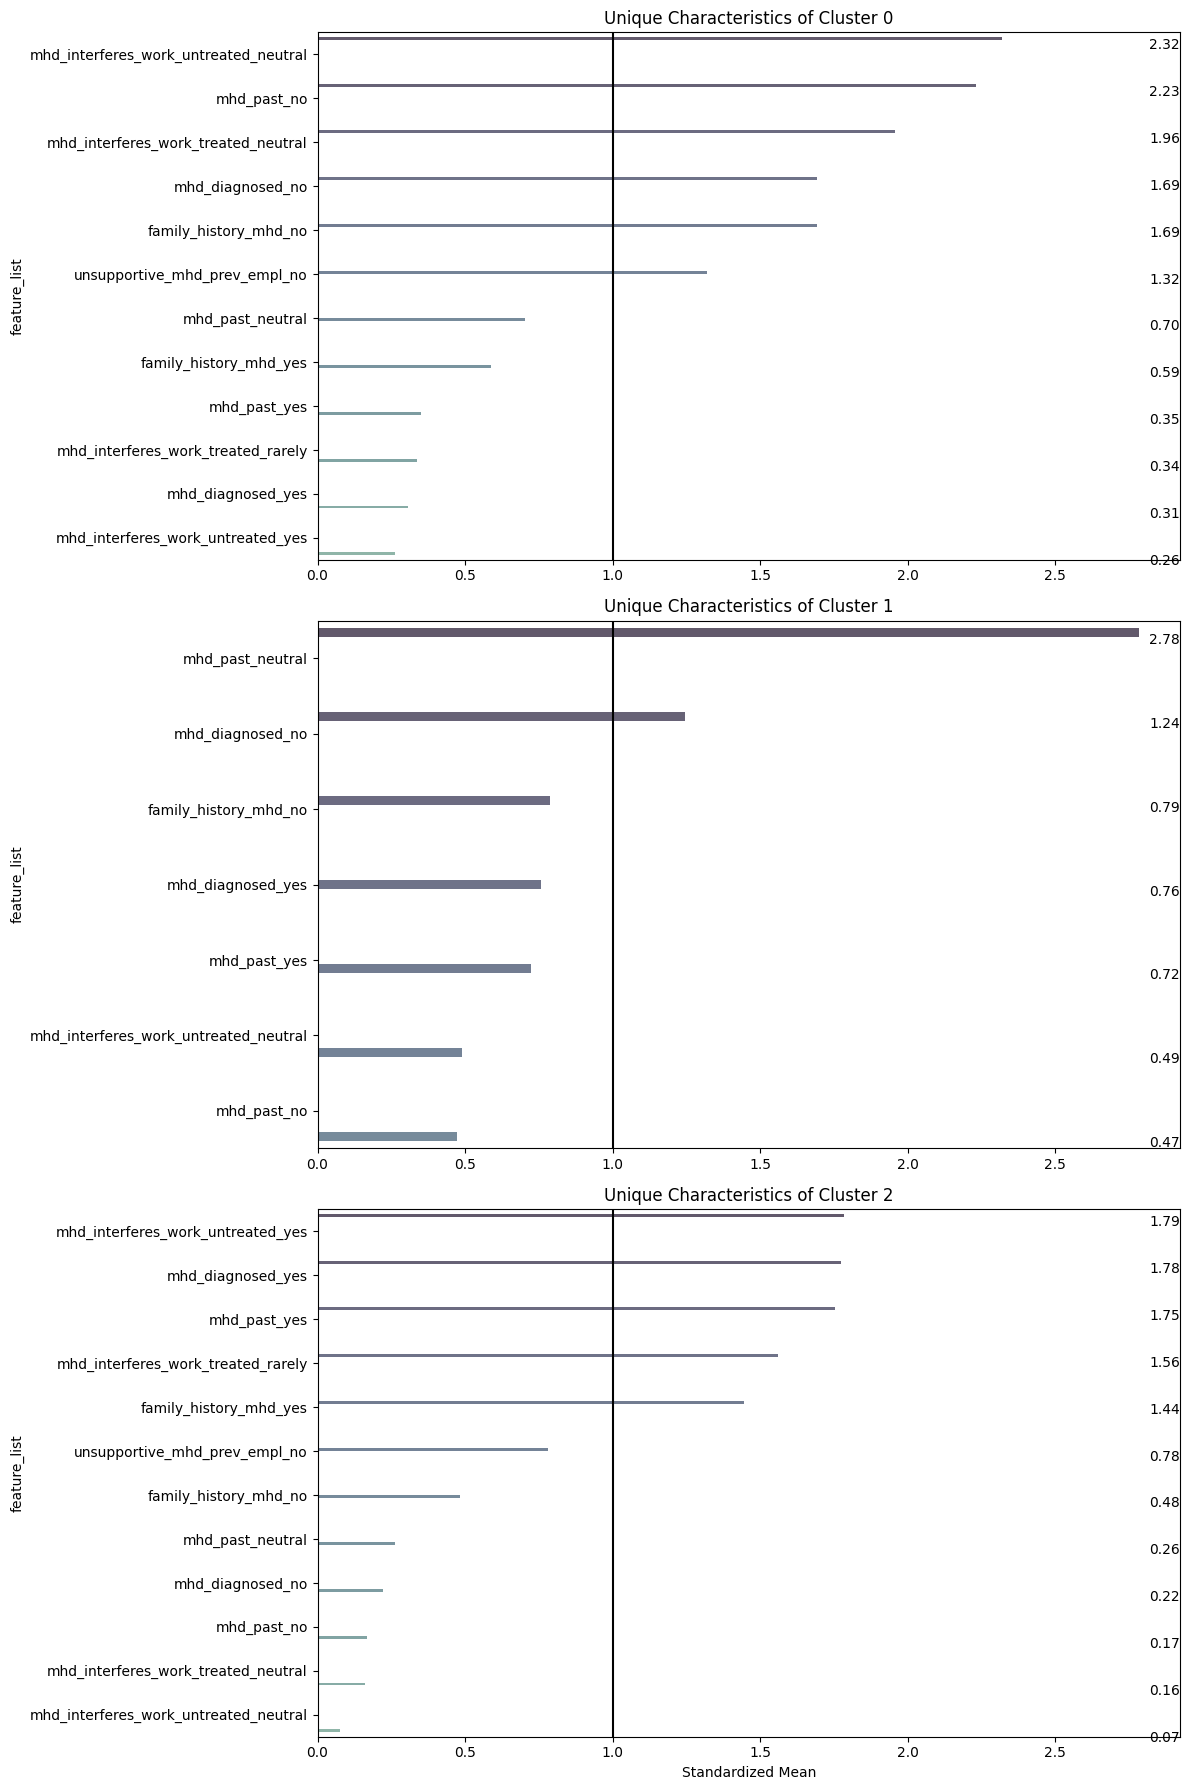

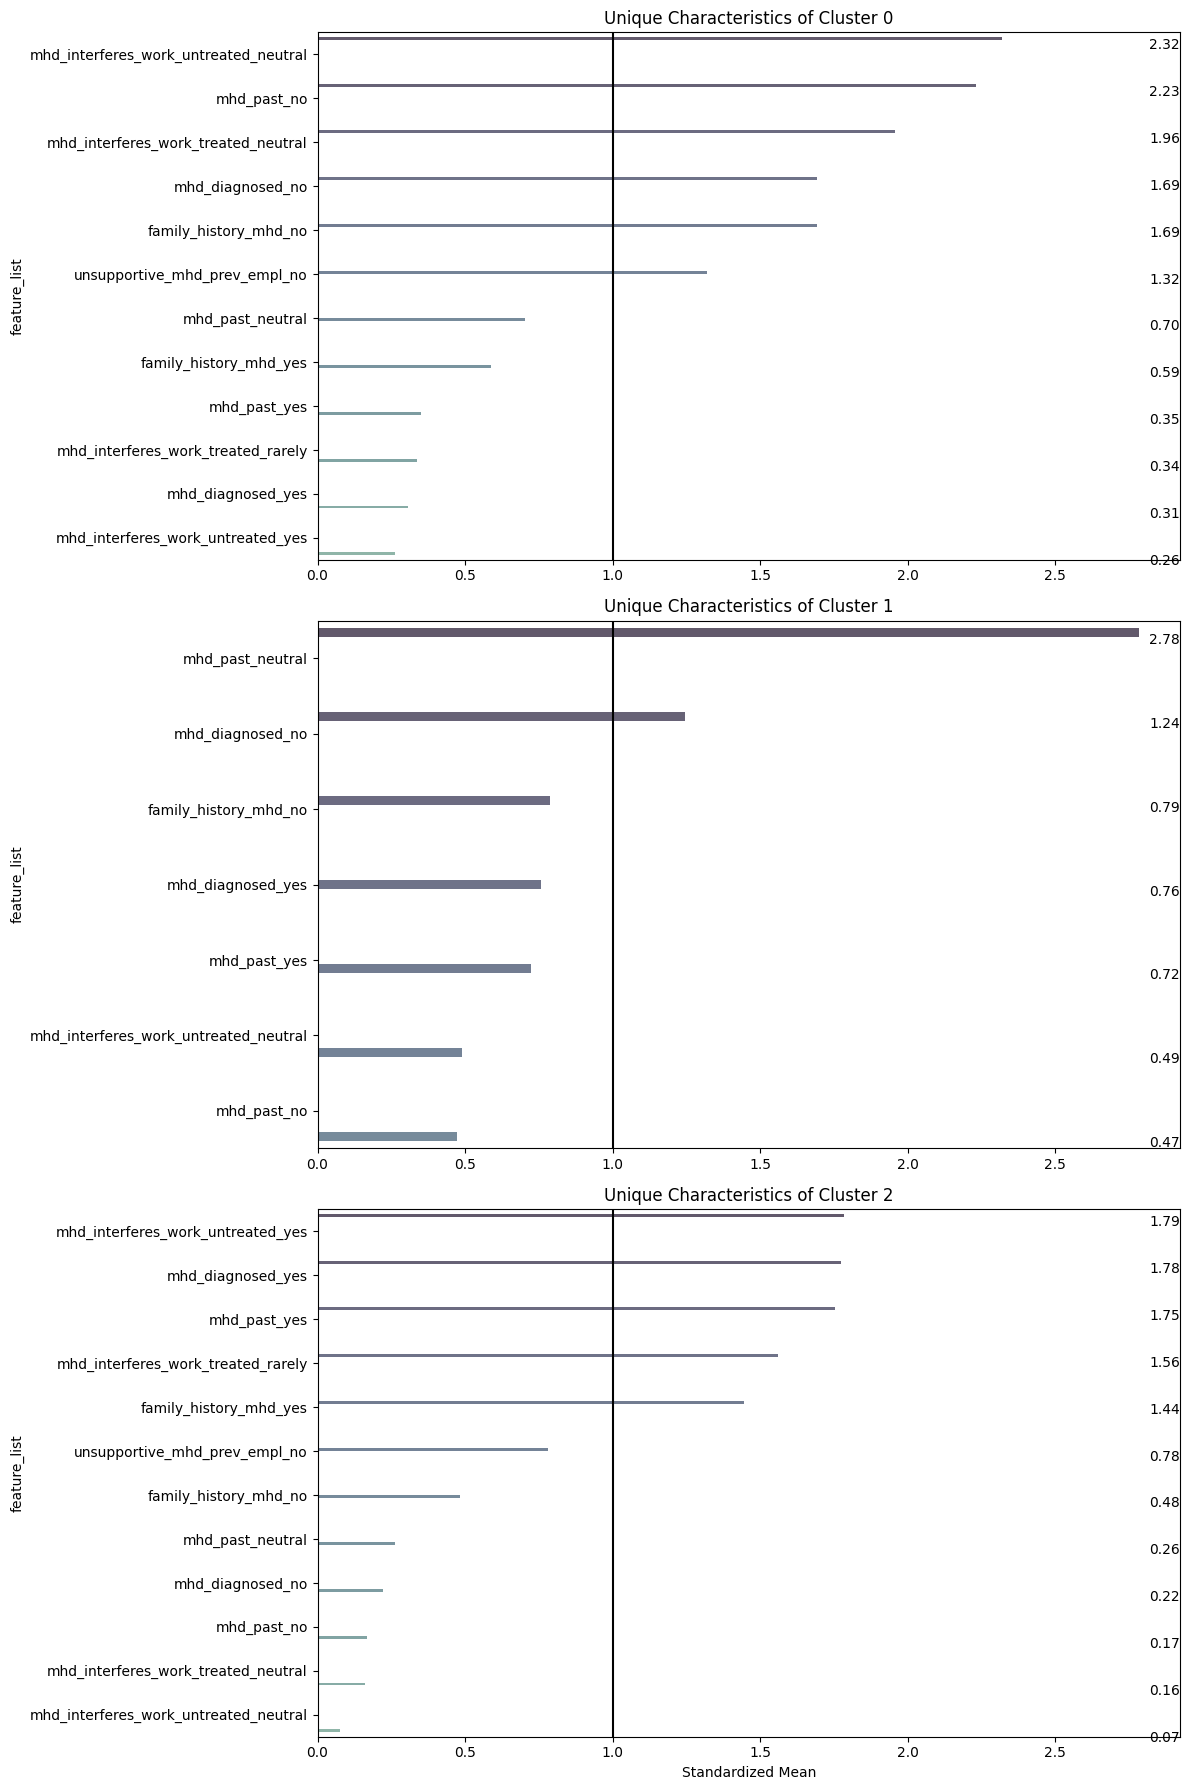

In [47]:
plot_features_all_cluster(df=final_tsne_mi, label_col='cluster_tsne', n_clusters=3, sensitivity=0.2)


# hierarchial clustering
    # chi2
    # mutual information


In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [49]:

# Perform hierarchical clustering chi2 
Z = linkage(tsne_result_mi005, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Determine clusters (e.g., cut the dendrogram at a certain height)
max_d = 7.0  # Adjust this value to get a different number of clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Add cluster assignments to the t-SNE DataFrame for visualization
chi2_tsne_results = pd.DataFrame(tsne_result_mi005, columns=['Component1', 'Component2'])
chi2_tsne_results['Cluster'] = clusters

# Plot the clustered t-SNE results
plt.scatter(chi2_tsne_results['Component1'], chi2_tsne_results['Component2'], c=chi2_tsne_results['Cluster'])
plt.title('t-SNE results with Hierarchical Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


ValueError: could not convert string to float: 'no'

In [ ]:
contingency_table = pd.crosstab(data['mhd_currently'], data['gender'])
print(contingency_table)

gender         female  male  other
mhd_currently                     
neutral            56   265      5
no                 99   428      0
yes               176   388     10


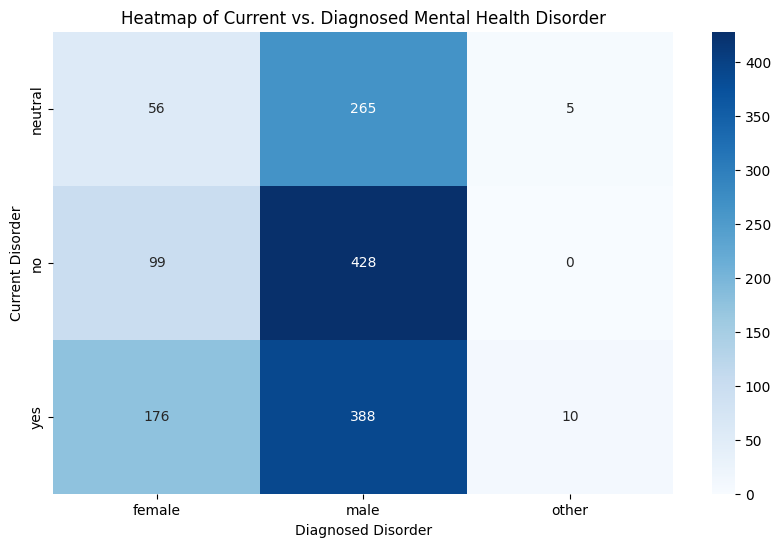

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Diagnosed Disorder')
plt.ylabel('Current Disorder')
plt.title('Heatmap of Current vs. Diagnosed Mental Health Disorder')

# Show the plot
plt.show()

In [ ]:
contingency_table = pd.crosstab(data['mhd_currently'], data['mhd_interferes_work_untreated'])
print(contingency_table)

mhd_interferes_work_untreated  neutral  no  rarely  some  yes
mhd_currently                                                
neutral                             53   7      23   144   99
no                                 399   3      13    60   52
yes                                 14   2      16   157  385


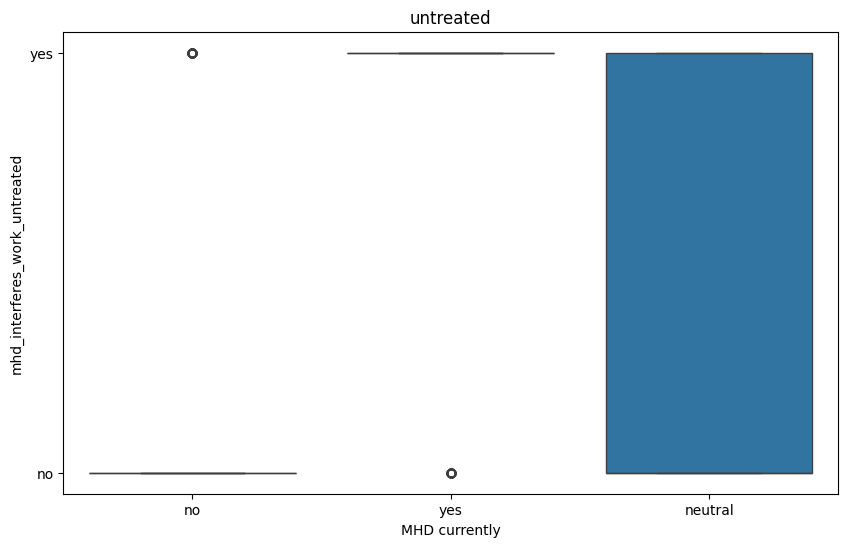

In [ ]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='mhd_currently', y='mhd_diagnosed', data=data)
plt.xlabel('MHD currently')
plt.ylabel('mhd_interferes_work_untreated')
plt.title('untreated')
plt.show()

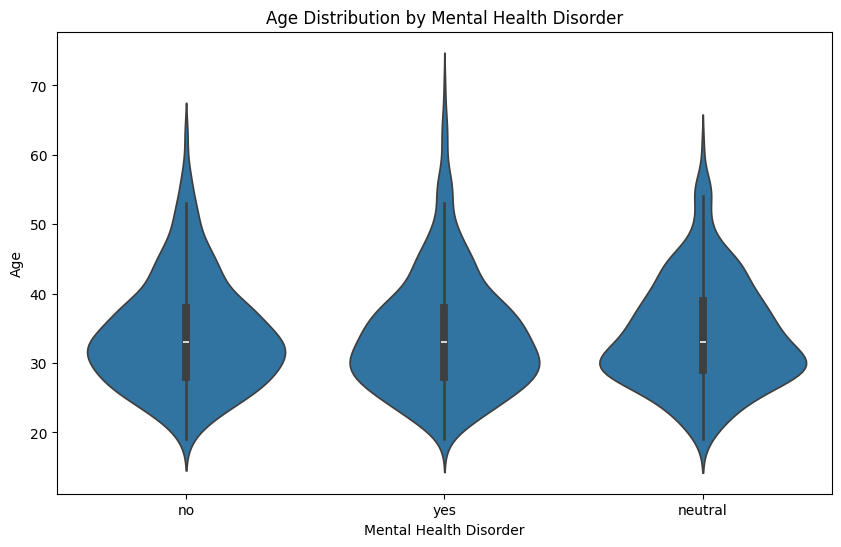

In [ ]:
# check why there is so little correlation between age and the people with currend mhd
# Violin plot does not show any indication
#so I try to divide the age in different categories
import seaborn as sns
import matplotlib.pyplot as plt

# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='mhd_currently', y='What is your age?', data=data)
plt.xlabel('Mental Health Disorder')
plt.ylabel('Age')
plt.title('Age Distribution by Mental Health Disorder')
plt.show()

age_group      intermediate  junior  senior
mhd_currently                              
neutral                 101     215       9
no                      164     350      11
yes                     164     388      21


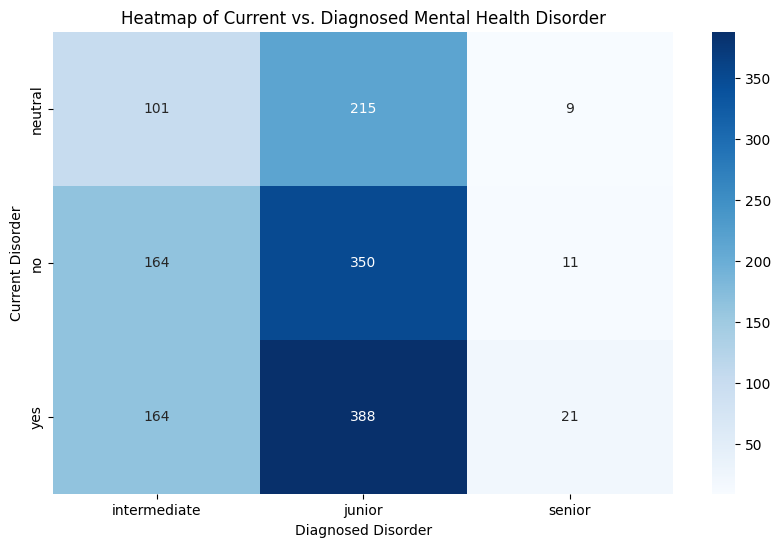

In [ ]:
# compare to age group
# over represented by people with 
contingency_table_age_group = pd.crosstab(data['mhd_currently'], data['age_group'])
print(contingency_table_age_group)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_age_group, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Diagnosed Disorder')
plt.ylabel('Current Disorder')
plt.title('Heatmap of Current vs. Diagnosed Mental Health Disorder')

# Show the plot
plt.show()

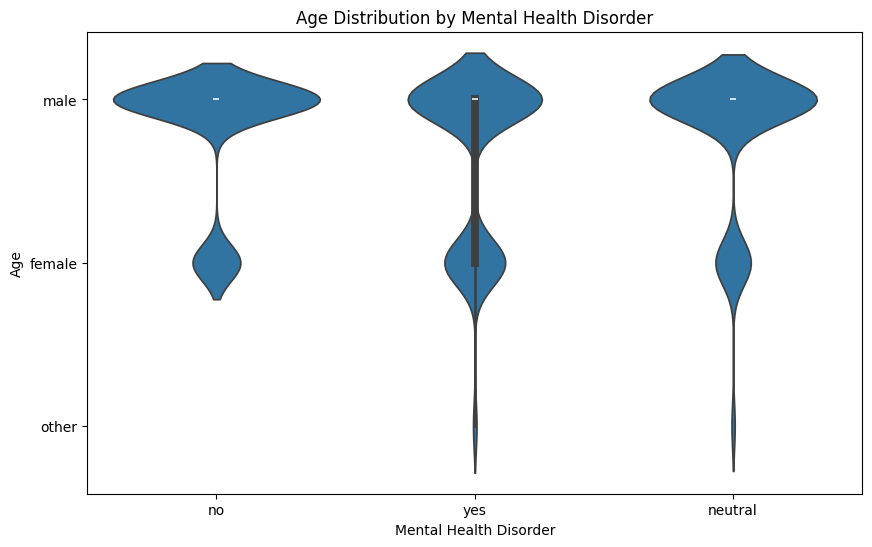

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='mhd_currently', y='gender', data=data)
plt.xlabel('Mental Health Disorder')
plt.ylabel('Age')
plt.title('Age Distribution by Mental Health Disorder')
plt.show()

## Use k-mode clustering

In [ ]:
from kmodes.kprototypes import KPrototypes
import numpy as np

In [ ]:
# all columns with misisng data
for column in df_anova.columns:
    if df_anova[column].isnull().any():
        print(column)
else:
    print('there is no missing data')


there is no missing data


In [ ]:
# check, whether the df contains ANY column of string (=object)
print(df_anova.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [ ]:
data.mental_health_benefit_employer.unique()

array(['neutral', 'no', 'yes'], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Identify categorical and numerical columns
#categorical_cols = data.select_dtypes(include=['object']).columns
#numerical_cols = data.select_dtypes(exclude=['object']).columns

# Create a ColumnTransformer that applies OneHotEncoder to categorical columns
# and leaves numerical columns unchanged
#preprocessor = ColumnTransformer(
    #transformers=[
       # (#'num', SimpleImputer(strategy='mean'), numerical_cols),
       # ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    #]
#)



# Create column names for the transformed data
# encoded_categorical_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
# all_columns = numerical_cols.tolist() + encoded_categorical_cols.tolist()

# Convert the result back to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=all_columns)

# Print the transformed DataFrame
transformed_df

NameError: name 'transformed_data' is not defined

In [ ]:
from kmodes.kmodes import KModes

# Running K-Prototypes clustering
km = KModes(n_clusters=5, init='Cao', n_init=5, verbose=1)
clusters = km.fit_predict(df2)

# Add cluster labels to the original data
df2['Cluster'] = clusters

# Print the clustered data

df2.head()

# Save the clustered data if needed
df2.to_csv('clustered_data.csv', index=False)



Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 440, cost: 13438.0
Run 1, iteration: 2/100, moves: 198, cost: 13168.0
Run 1, iteration: 3/100, moves: 43, cost: 13156.0
Run 1, iteration: 4/100, moves: 2, cost: 13156.0


In [ ]:
df2

,mental_health_benefit_employer,knowledge_mh_care_employer,employer_mh_resoureces,anonymity_mh_care,mh_leave_request,mh_disoder_neg_consequences,ph_disoder_neg_consequences,comfortable_dicuss_mhd_coworkers,mh_equal_to_ph,prev_emp_mh_benefits,...,neg_view_coworker_mhd,willing_share_mhd_family_friends,unsupportive_mhd_prev_empl,family_history_mhd,mhd_past,mhd_diagnosed,mhd_interferes_work_treated,mhd_interferes_work_untreated,gender,Cluster
0,0,1,1,0,4,1,1,0,0,1,...,1,3,1,1,2,1,0,0,1,0
1,1,2,2,2,3,1,1,0,2,3,...,1,3,1,2,2,1,2,3,1,3
2,1,1,1,0,0,0,1,0,0,1,...,0,3,0,1,0,0,0,0,1,0
3,2,1,1,0,0,0,1,0,0,2,...,0,0,1,1,2,1,3,3,1,0
4,2,2,1,1,0,2,0,0,1,0,...,0,3,2,2,2,1,3,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,2,1,1,0,0,0,1,0,0,3,...,0,3,0,2,1,0,0,0,0,0
1423,2,1,1,0,0,0,1,0,0,2,...,2,2,0,2,1,1,3,4,1,1
1424,2,2,2,0,2,0,0,2,0,2,...,1,3,2,2,2,1,2,3,1,1
1425,0,0,2,0,2,0,1,0,1,1,...,1,3,2,2,0,1,3,4,0,4


In [ ]:
data = df2

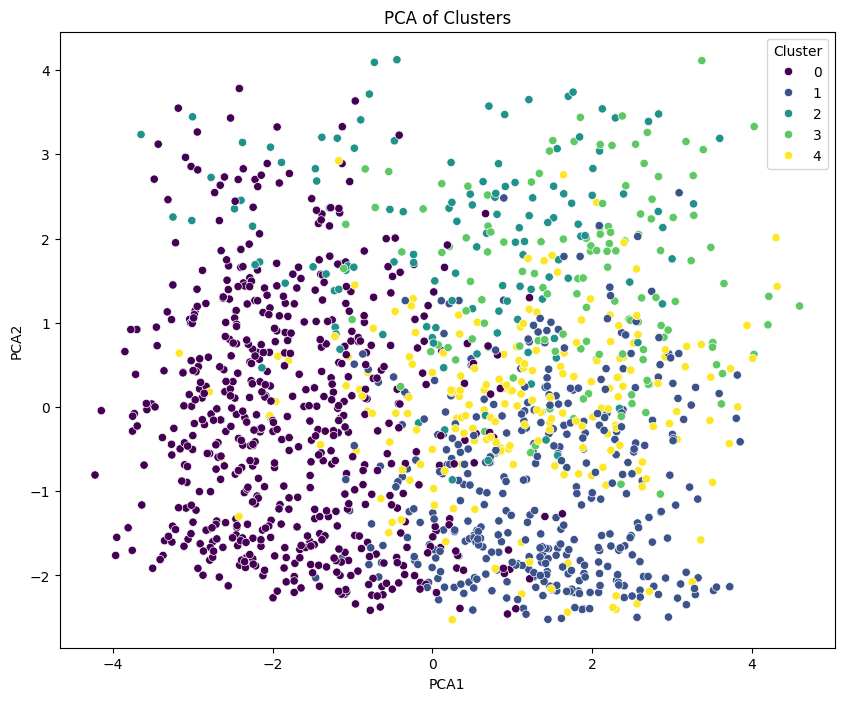

Cluster profiles:
   mental_health_benefit_employer  knowledge_mh_care_employer  \
0                               2                           1   
3                               2                           2   
4                               0                           1   
1                               2                           1   
2                               2                           2   

   employer_mh_resoureces  anonymity_mh_care  mh_leave_request  \
0                       1                  0                 0   
3                       2                  2                 3   
4                       1                  0                 1   
1                       1                  0                 0   
2                       2                  2                 4   

   mh_disoder_neg_consequences  ph_disoder_neg_consequences  \
0                            0                            1   
3                            1                            1   
4    

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns 

# Visualize the clusters using PCA
# Use PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
# Standardize the data before applying PCA
scaled_data = StandardScaler().fit_transform(data.drop('Cluster', axis=1))
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']

# Plot the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA of Clusters')
plt.show()

# Cluster profile: Most common values in each cluster
def cluster_profiles(df, cluster_label):
    profiles = {}
    for cluster in df[cluster_label].unique():
        cluster_data = df[df[cluster_label] == cluster]
        profile = cluster_data.mode().iloc[0]
        profiles[cluster] = profile
    return pd.DataFrame(profiles).T

profiles = cluster_profiles(data, 'Cluster')
print("Cluster profiles:")
print(profiles)

# Box plot of features by cluster
#for col in data.columns:
    #if col != 'Cluster':
        #plt.figure(figsize=(10, 6))
        #sns.boxplot(x='Cluster', y=col, data=data)
        #plt.title(f'Box plot of {col} by Cluster')
        #plt.show()

In [ ]:
def main_cluster_feature(data,cluster, percent):
    cluster_data = data[data['Cluster'] == cluster]
    percentage_ones = cluster_data.mean()
    percentage = percent
    columns_with_more_than_percent_ones = percentage_ones[percentage_ones > percentage].index.tolist()
    columns_with_more_than_percent_ones =pd.DataFrame(columns_with_more_than_percent_ones)
    return columns_with_more_than_percent_ones


In [ ]:
cluster0_percent0_5 = main_cluster_feature(data,0,0.5)
cluster1_percent0_5 = main_cluster_feature(data,1,0.5)
cluster2_percent0_5 = main_cluster_feature(data,2,0.5)
cluster3_percent0_5 = main_cluster_feature(data,3,0.5)
cluster4_percent0_5 = main_cluster_feature(data,4,0.5)

In [ ]:
cluster0_percent0_8 = main_cluster_feature(data,0,0.8)
cluster1_percent0_8 = main_cluster_feature(data,1,0.8)
cluster2_percent0_8 = main_cluster_feature(data,2,0.8)
cluster3_percent0_8 = main_cluster_feature(data,3,0.8)
cluster4_percent0_8 = main_cluster_feature(data,4,0.8)

In [ ]:
df_0_05 = cluster0_percent0_5

In [ ]:
df_0_05

,0
0,mental_health_benefit_employer
1,knowledge_mh_care_employer
2,employer_mh_resoureces
3,mh_leave_request
4,ph_disoder_neg_consequences
5,comfortable_dicuss_mhd_coworkers
6,mh_equal_to_ph
7,prev_emp_mh_benefits
8,awareness_mh_benefits_prev_emp
9,prev_empl_discuss_mhd_neg


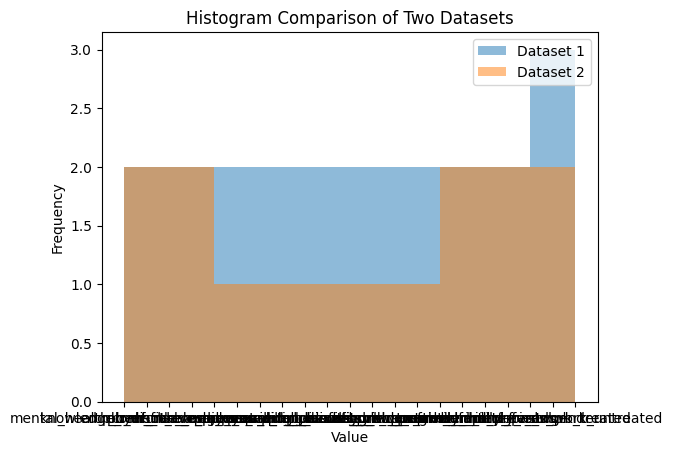

In [ ]:
import matplotlib.pyplot as plt

# Example data
data1 = cluster0_percent0_5
data2= cluster0_percent0_8

# Create histograms
plt.hist(data1, bins=10, alpha=0.5, label='Dataset 1')
plt.hist(data2, bins=10, alpha=0.5, label='Dataset 2')

# Add titles and labels
plt.title('Histogram Comparison of Two Datasets')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [ ]:
pd.unique(data1)

/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_1783/1243913847.py:1: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.unique(data1)


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [ ]:
cluster0_percent0_5

,0
0,What is your age?
1,mental_health_benefit_employer_yes
2,knowledge_mh_care_employer_no
3,disc_emp_mental_health_no
4,employer_mh_resoureces_no
5,anonymity_mh_care_neutral
6,mh_leave_request_neutral
7,mh_disoder_neg_consequences_neutral
8,ph_disoder_neg_consequences_no
9,comfortable_dicuss_mhd_coworkers_neutral


In [ ]:
cluster4_percent0_8

,0
0,What is your age?
1,ph_disoder_neg_consequences_no
2,when_open_mhd_neg_consequences_no
3,prev_empl_privde_recources_mh_no
4,anonymity_mh_treatment_prev_empl_neutral
5,observe_neg_cons_mh_prev_empl_no
6,mhd_past_no
7,mhd_currently_no
8,mhd_diagnosed_no
9,mhd_interferes_work_treated_neutral


In [ ]:
cluster1_percent0_8

,0
0,What is your age?
1,ph_disoder_neg_consequences_no
2,when_open_mhd_neg_consequences_no
3,anonymity_mh_treatment_prev_empl_neutral
4,mhd_past_yes
5,mhd_diagnosed_yes
6,Cluster


In [ ]:
cluster2_percent0_8

,0
0,What is your age?
1,disc_emp_mental_health_no
2,discuss_prev_empl_mh_no
3,prev_empl_privde_recources_mh_no
4,willing_discuss_mh_potent_empl_no
5,mhd_hurt_career_yes
6,mhd_past_yes
7,mhd_diagnosed_yes
8,Cluster


In [ ]:
cluster3_percent0_8

,0
0,What is your age?
1,disc_emp_mental_health_no
2,when_open_mhd_neg_consequences_no
3,awareness_mh_benefits_prev_emp_yes
4,Cluster


In [ ]:
cluster4_percent0_8

,0
0,What is your age?
1,ph_disoder_neg_consequences_no
2,when_open_mhd_neg_consequences_no
3,prev_empl_privde_recources_mh_no
4,anonymity_mh_treatment_prev_empl_neutral
5,observe_neg_cons_mh_prev_empl_no
6,mhd_past_no
7,mhd_currently_no
8,mhd_diagnosed_no
9,mhd_interferes_work_treated_neutral


In [ ]:
combined_df_80_perc = pd.concat([cluster0_percent0_8,cluster1_percent0_8,cluster2_percent0_8,cluster3_percent0_8,cluster4_percent0_8])

In [ ]:
combined_df_80_perc

,0
0,What is your age?
1,disc_emp_mental_health_no
2,employer_mh_resoureces_no
3,anonymity_mh_care_neutral
4,mh_disoder_neg_consequences_neutral
5,ph_disoder_neg_consequences_no
6,mh_equal_to_ph_neutral
7,when_open_mhd_neg_consequences_no
8,discuss_prev_empl_mh_no
9,prev_empl_privde_recources_mh_no


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for col in combined_df_80_perc.columns:
    cluster_col = combined_df_80_perc
    plt.figure(figsize=(14, 6))
    sns.histplot(data=combined_df_80_perc, x=col, hue=cluster_col, multiple='stack', kde=True, palette='tab10')
    plt.title(f'Histogram of {col} by Cluster')
    plt.show()

ValueError: 2

<Figure size 1400x600 with 0 Axes>

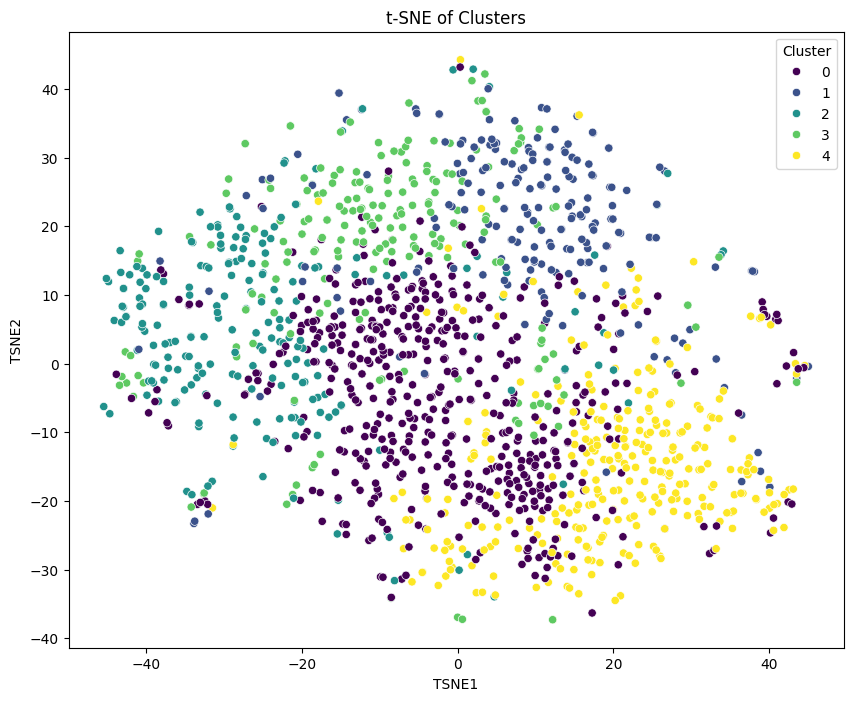

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)

# Create a DataFrame with t-SNE components and cluster labels
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = data['Cluster']

# Plot the t-SNE components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=tsne_df, palette='viridis')
plt.title('t-SNE of Clusters')
plt.show()

In [ ]:
!pip3.12 uninstall umap

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/umap-0.1.1.dist-info/*
    /Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/umap/*
  Would not remove (might be manually added):
    /Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/umap/aligned_umap.py
    /Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/umap/distances.py
    /Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/umap/layouts.py
    /Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/umap/parametric_umap.py
    /Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/umap/plot.py
    /Users/user/IUBH/Semester3/unsupervisedML/unsupervised/lib/python3.12/site-packages/umap/sparse.py
    /Users/user/IUBH/Semester3/u

In [ ]:
!pip3.12 install umap-learn

  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 466.7 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.0 MB/s eta 0:00:00
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 7.8 MB/s eta 0:00:0000:0100:01


In [ ]:
import umap.umap_ as umap

# Run UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_components = umap_reducer.fit_transform(scaled_data)

# Create a DataFrame with UMAP components and cluster labels
umap_df = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = data['Cluster']

# Plot the UMAP components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', data=umap_df, palette='viridis')
plt.title('UMAP of Clusters')
plt.show()

ModuleNotFoundError: No module named 'umap.umap_'